In [9]:
#Importacion de librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

### Carga de Datos

In [10]:
# Cargando los datos
train_data = pd.read_csv('train_clean.csv')
test_data = pd.read_csv('test_clean.csv')

In [11]:

# Conveertir los valores booleanos a números binarios
train_data["Embarked_C"] = train_data["Embarked_C"].astype(int)
train_data["Embarked_S"] = train_data["Embarked_S"].astype(int)


train_data.Survived.value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

### Preparación de Datos

In [12]:
# Preparando las características y la variable objetivo
X = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = train_data['Survived']

# Dividiendo los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Análisis de la Profundidad del Árbol

El gráfico anterior muestra la precisión del modelo en función de la profundidad máxima del árbol de decisiones.

**Observaciones**:
1. La precisión del conjunto de entrenamiento aumenta constantemente a medida que aumenta la profundidad del árbol. Esto es esperado ya que un árbol más profundo puede ajustarse mejor a los datos de entrenamiento.
2. La precisión del conjunto de validación, sin embargo, alcanza un pico y luego comienza a disminuir. Esto sugiere que el modelo comienza a hacer overfitting en los datos de entrenamiento después de cierta profundidad.
3. La profundidad que parece proporcionar la mejor precisión en el conjunto de validación está entre 3 y 5.

Con base en este análisis, una profundidad de 4 parece una elección razonable. 

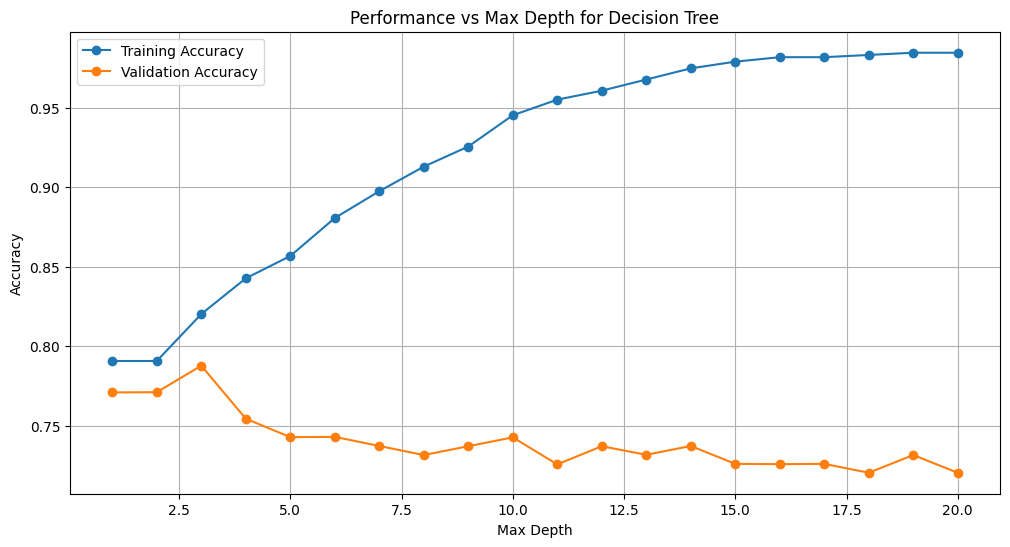

In [15]:

# Definir el rango de las profundidades
max_depths = list(range(1, 21))

# Evalua el arbol de decisiones con diferentes profundidades
train_scores = []
val_scores = []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    # Training score
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    
    # Validation score usando validación cruzada (cross-validation)
    scores = cross_val_score(clf, X_val, y_val, cv=5, scoring='accuracy')
    val_scores.append(scores.mean())

# Grafica los resultados
plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_scores, label='Training Accuracy', marker='o')
plt.plot(max_depths, val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Performance vs Max Depth for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


### Entrenamiento y Evaluación del Modelo

In [13]:
# Creando el modelo de árbol de decisiones
clf = DecisionTreeClassifier(max_depth=4)

# Entrenando el modelo
clf.fit(X_train, y_train)

# Haciendo predicciones en el conjunto de validación
y_pred = clf.predict(X_val)

# Evaluando el modelo
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       112
           1       0.84      0.61      0.71        67

    accuracy                           0.81       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.81      0.80       179


Confusion Matrix:
 [[104   8]
 [ 26  41]]


### Visualización del Árbol de Decisiones

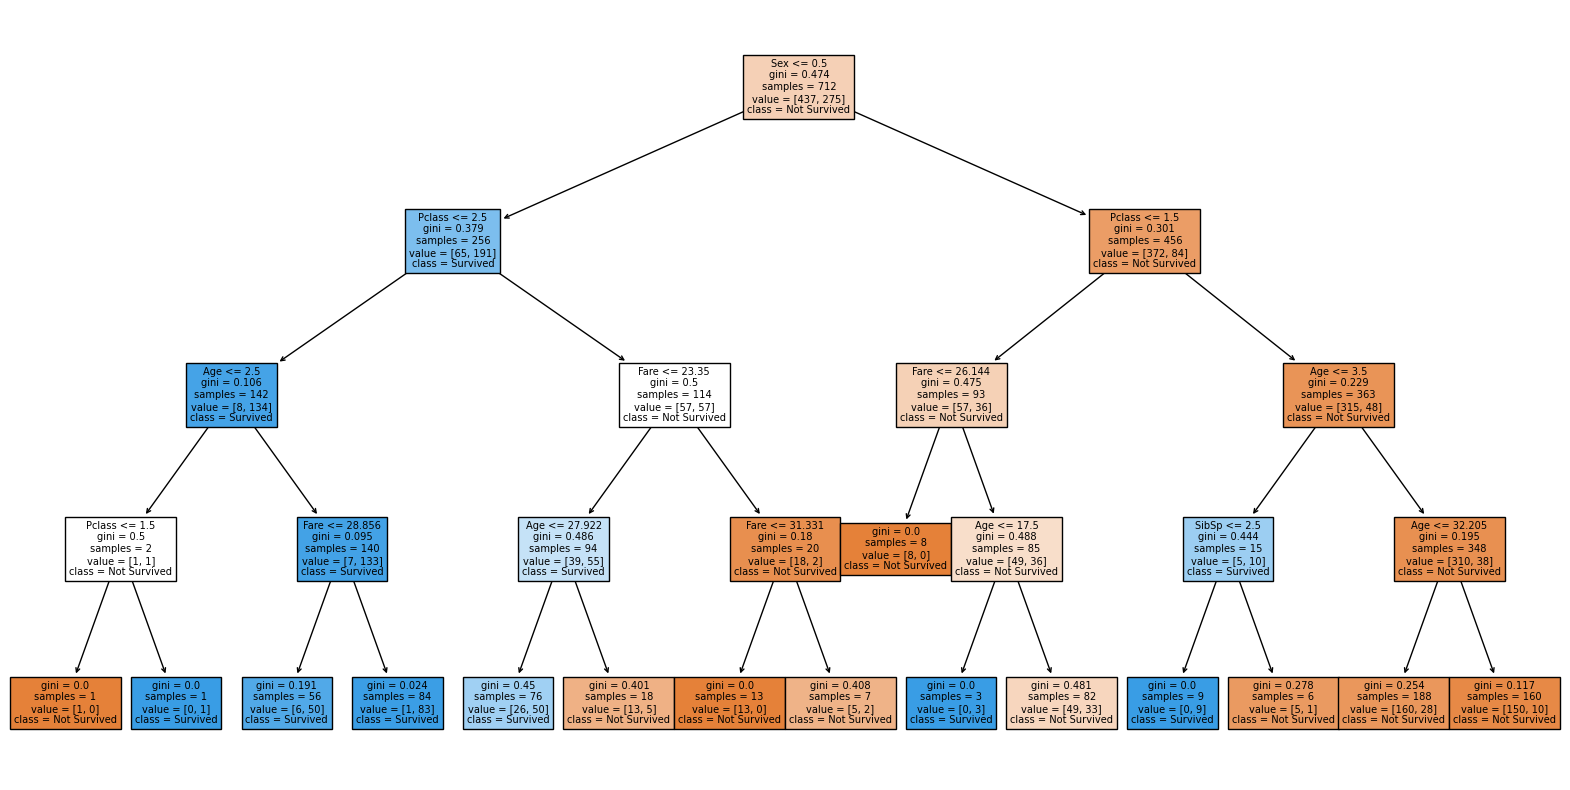

In [14]:
# Visualizando el árbol de decisiones
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.show()